In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('../DATA/cancer_classification.csv')

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<AxesSubplot:>

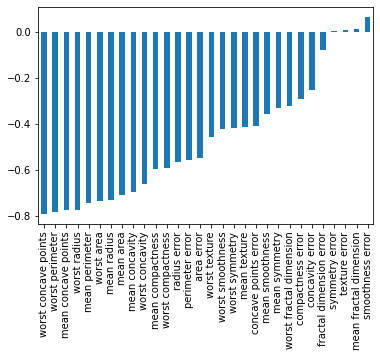

In [6]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X=df.drop('benign_0__mal_1',axis=1)

In [9]:
y=df['benign_0__mal_1']

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler=MinMaxScaler()

In [28]:
X_train=scaler.fit_transform(X_train)

In [29]:
X_test=scaler.transform(X_test)

In [30]:
from tensorflow.keras.models import Sequential

In [31]:
from tensorflow.keras.layers import Dense,Dropout

In [37]:
model=Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [38]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 0.6937 - val_loss: 0.6784
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6675 - val_loss: 0.6532
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6399 - val_loss: 0.6252
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6097 - val_loss: 0.5925
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5740 - val_loss: 0.5531
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5335 - val_loss: 0.5105
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4921 - val_loss: 0.4670
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4489 - val_loss: 0.4228
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4101 - val_loss: 0.3839
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3749 - val_loss: 0.3518
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.0518 - val_loss: 0.1065
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0508 - val_loss: 0.1078
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0503 - val_loss: 0.1059
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0500 - val_loss: 0.1039
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0496 - val_loss: 0.1081
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0495 - val_loss: 0.1033
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0492 - val_loss: 0.1064
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0487 - val_loss: 0.1073
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0492 - val_loss: 0.1051
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0490 - val_loss: 0.1081
Epoch 93/600


14/14 [==============================] - 0s 4ms/step - loss: 0.0254 - val_loss: 0.1180
Epoch 246/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0250 - val_loss: 0.1223
Epoch 247/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0259 - val_loss: 0.1247
Epoch 248/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0257 - val_loss: 0.1221
Epoch 249/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0257 - val_loss: 0.1199
Epoch 250/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0246 - val_loss: 0.1227
Epoch 251/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0272 - val_loss: 0.1229
Epoch 252/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0357 - val_loss: 0.1239
Epoch 253/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0291 - val_loss: 0.1252
Epoch 254/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0254 - val_loss: 0.1222
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0137 - val_loss: 0.1594
Epoch 408/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0133 - val_loss: 0.1454
Epoch 409/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0124 - val_loss: 0.1772
Epoch 410/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0145 - val_loss: 0.1477
Epoch 411/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0124 - val_loss: 0.1535
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0127 - val_loss: 0.1546
Epoch 413/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0109 - val_loss: 0.1547
Epoch 414/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0113 - val_loss: 0.1511
Epoch 415/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0111 - val_loss: 0.1578
Epoch 416/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0113 - val_loss: 0.1569
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.1949
Epoch 570/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0041 - val_loss: 0.1968
Epoch 571/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0047 - val_loss: 0.2001
Epoch 572/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0043 - val_loss: 0.1960
Epoch 573/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0052 - val_loss: 0.2072
Epoch 574/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0044 - val_loss: 0.1951
Epoch 575/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0050 - val_loss: 0.1961
Epoch 576/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0043 - val_loss: 0.2003
Epoch 577/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0043 - val_loss: 0.1858
Epoch 578/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0048 - val_loss: 0.1915
Epoc

In [39]:
model_loss=pd.DataFrame(model.history.history)

<AxesSubplot:>

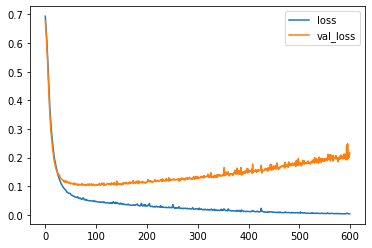

In [40]:
model_loss.plot()

In [52]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')






from tensorflow.keras.callbacks import EarlyStopping

In [53]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [54]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 0.6949 - val_loss: 0.6796
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6701 - val_loss: 0.6568
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6464 - val_loss: 0.6317
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6191 - val_loss: 0.5994
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5860 - val_loss: 0.5610
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5479 - val_loss: 0.5184
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5045 - val_loss: 0.4751
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4630 - val_loss: 0.4307
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4196 - val_loss: 0.3880
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3808 - val_loss: 0.3476
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.0545 - val_loss: 0.1136
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0542 - val_loss: 0.1138
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0543 - val_loss: 0.1142
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0571 - val_loss: 0.1111
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0542 - val_loss: 0.1126
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0543 - val_loss: 0.1118
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0554 - val_loss: 0.1166
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0642 - val_loss: 0.1086
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0559 - val_loss: 0.1123
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0534 - val_loss: 0.1158
Epoch 93/600


<AxesSubplot:>

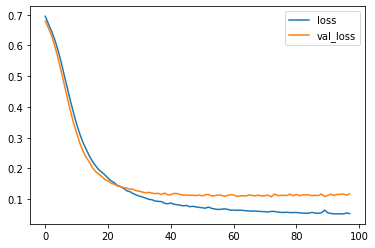

In [55]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [59]:

from tensorflow.keras.layers import Dropout

In [61]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [62]:
model.fit(x=X_train,
         y=y_train,
         epochs=600,
         validation_data=(X_test,y_test),
         verbose=1,
         callbacks=[early_stop]
         )

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 0.6967 - val_loss: 0.6717
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6947 - val_loss: 0.6564
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6540 - val_loss: 0.6328
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6380 - val_loss: 0.6037
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6227 - val_loss: 0.5737
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6001 - val_loss: 0.5435
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5644 - val_loss: 0.5098
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5188 - val_loss: 0.4742
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5067 - val_loss: 0.4419
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4898 - val_loss: 0.4116
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.1032 - val_loss: 0.0854
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1269 - val_loss: 0.0891
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0952 - val_loss: 0.0911
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1038 - val_loss: 0.0847
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1155 - val_loss: 0.0916
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0955 - val_loss: 0.0844
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0858 - val_loss: 0.0838
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1095 - val_loss: 0.0907
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1249 - val_loss: 0.0836
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1118 - val_loss: 0.0845
Epoch 93/600


<AxesSubplot:>

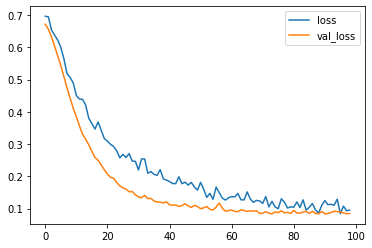

In [63]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [91]:
predictions = (model.predict(X_test) > 0.5).astype("int32")


In [92]:
from sklearn.metrics import classification_report,confusion_matrix

In [93]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [94]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 1 87]]
